* Create a small application in a programming language of choice where a user can upload 1 or more receipts/invoices. The application then calls the Klippa OCR API, handles the wait time and response to then visualize the result nicely for the user (both the JSON as well as a readable overview in for example a table format). Make sure to use OOP style programming, write clean code and document your code. You can find the documentation of our API here and below is your API key with 100 credits:

## Prepare all the needed libraries 

In [14]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# To display all the rows of extracted pandas 
pd.set_option('display.max_rows', None)

from IPython.display import Image

## The needed Klippa API libbraries 
from __future__ import print_function
import time
import klippa_ocr_api
from klippa_ocr_api.rest import ApiException
from pprint import pprint

In [15]:
# Open an invoice sample 
file_path = 'invoice-1.jpg'
image= Image(file_path)

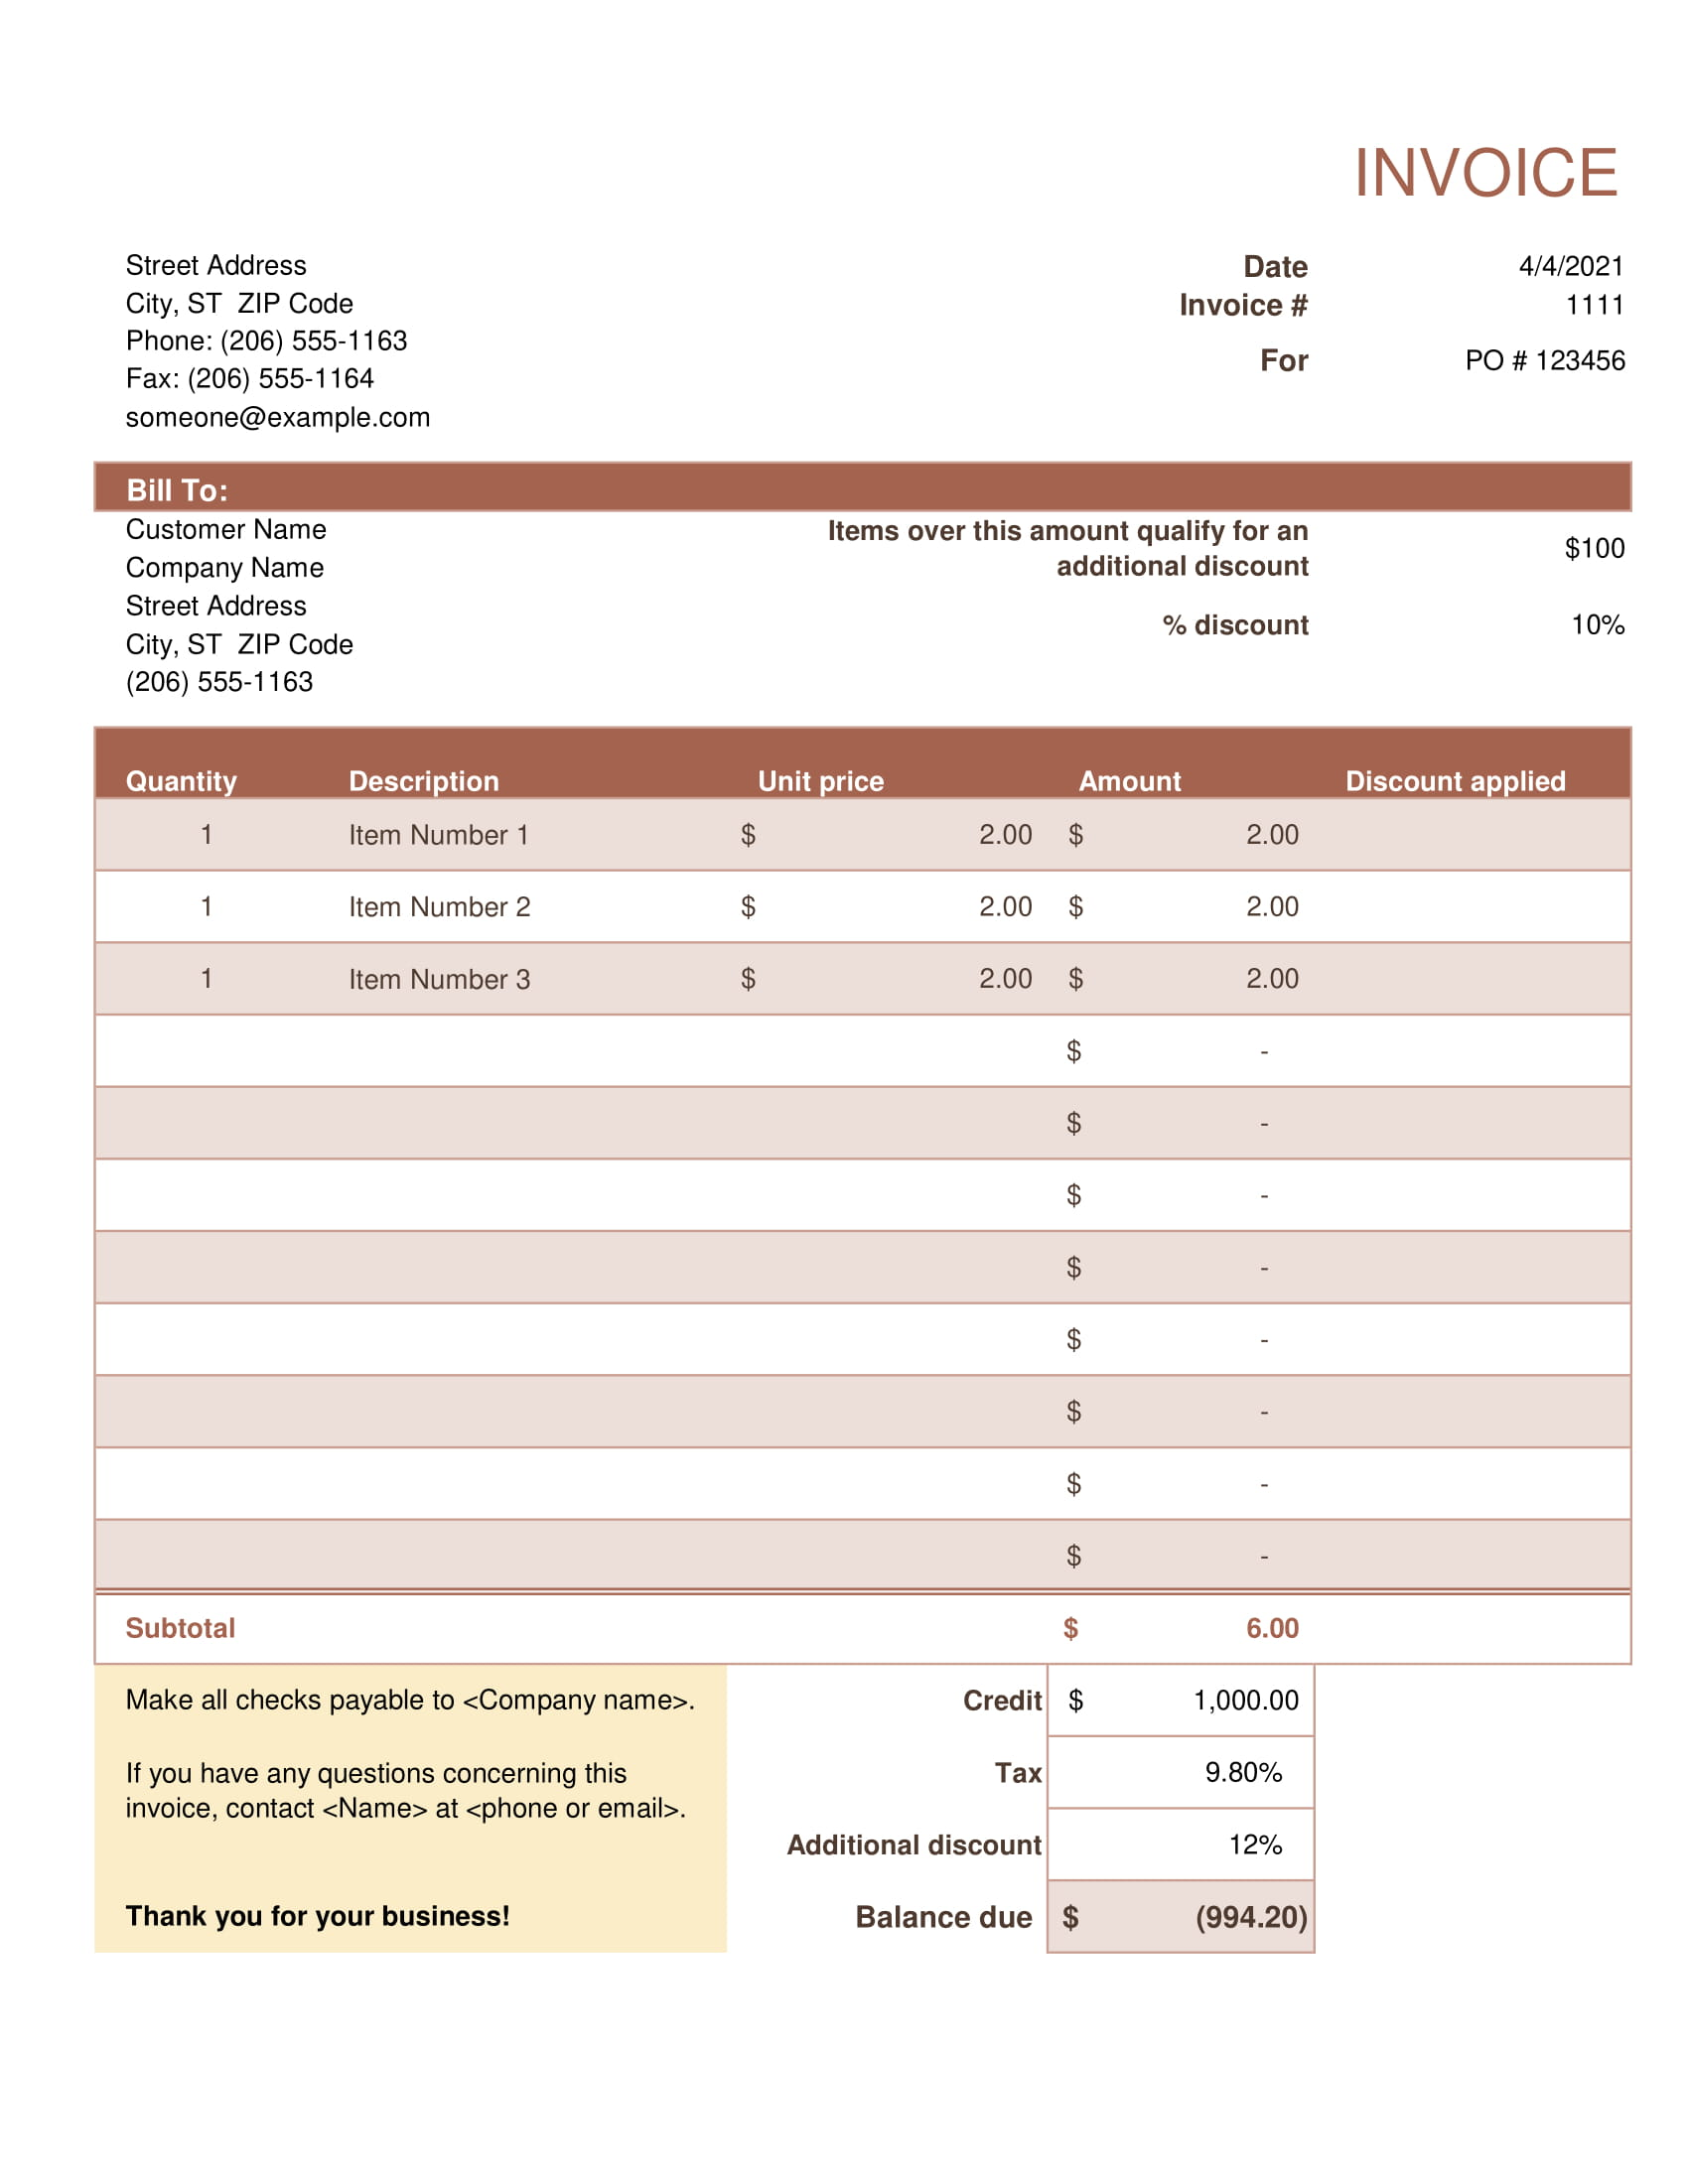

In [16]:
# display the invoice sample 
image

In [17]:
# dir(klippa_ocr_api)

In [18]:
#################################################################################################################
# Post(upload) the invoice to klippa API where it will be parsed, and information is extracted using OCR vision #
#################################################################################################################

# Defining the host is optional and defaults to https://custom-ocr.klippa.com/api/v1
# See configuration.py for a list of all supported configuration parameters.
configuration = klippa_ocr_api.Configuration(
    host = "https://custom-ocr.klippa.com/api/v1"
)

#############################################################################################################################
## After extracting the data I changed the APIKey Header to asterix since I will put this notebook in my public repositories#
##Alternative way is to convert the Key to Json and then read                                                               #
#############################################################################################################################
# Configure API key authorization: APIKeyHeader
configuration = klippa_ocr_api.Configuration(
    host = "https://custom-ocr.klippa.com/api/v1",
    api_key = {
        'X-Auth-Key': '***********************'
    }
)

# Enter a context with an instance of the API client
with klippa_ocr_api.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = klippa_ocr_api.ParsingApi(api_client)
    
    #######################################################################################################
    ### It can be 1 or multiple documents by passing document as an array, since class parse_document uses#
    ### **kwargs                                                                                          #
    #######################################################################################################
    document = file_path # The invoice at the same folder of source code for simplicity
    
    try:
        # Template Financial (default): Parse GIF, PNG, JPG, HEIC/HEIF or PDF file.
        api_response = api_instance.parse_document(document=document)#, url=url, template=template, pdf_text_extraction=pdf_text_extraction, user_data=user_data, user_data_set_external_id=user_data_set_external_id, hash_duplicate_group_id=hash_duplicate_group_id)
    
        pprint(api_response)

        
    except ApiException as e:
        print("Exception when calling ParsingApi->parse_document: %s\n" % e)

{'data': {'amount': 99420,
          'amount_change': 0,
          'amount_shipping': 0,
          'amountexvat': 99420,
          'barcodes': None,
          'currency': 'USD',
          'customer_address': '',
          'customer_bank_account_number': '',
          'customer_bank_account_number_bic': '',
          'customer_city': '',
          'customer_coc_number': '',
          'customer_country': '',
          'customer_email': '',
          'customer_house_number': '',
          'customer_municipality': '',
          'customer_name': 'Customer Name',
          'customer_number': '',
          'customer_phone': '',
          'customer_province': '',
          'customer_reference': '',
          'customer_street_name': '',
          'customer_vat_number': '',
          'customer_website': '',
          'customer_zipcode': '',
          'date': '2021-04-04T00:00:00',
          'document_language': 'EN',
          'document_subject': '',
          'document_type': 'invoice',
       

In [19]:
type(api_response)

klippa_ocr_api.models.receipt_body.ReceiptBody

In [20]:
api_instance

In [21]:
# Get the parsed information as a dict to make it easy to display it as a table  

with klippa_ocr_api.ApiClient(configuration)  as api_client:
    api_instance2=klippa_ocr_api.ApiClient()
    

    api_response_deserialize= api_instance2.sanitize_for_serialization(api_response)


In [22]:
type(api_response_deserialize)

dict

In [23]:
api_response_deserialize

{'data': {'amount': 99420,
  'amount_change': 0,
  'amount_shipping': 0,
  'amountexvat': 99420,
  'currency': 'USD',
  'customer_address': '',
  'customer_bank_account_number': '',
  'customer_bank_account_number_bic': '',
  'customer_city': '',
  'customer_coc_number': '',
  'customer_country': '',
  'customer_email': '',
  'customer_house_number': '',
  'customer_municipality': '',
  'customer_name': 'Customer Name',
  'customer_number': '',
  'customer_phone': '',
  'customer_province': '',
  'customer_reference': '',
  'customer_street_name': '',
  'customer_vat_number': '',
  'customer_website': '',
  'customer_zipcode': '',
  'date': '2021-04-04T00:00:00',
  'document_language': 'EN',
  'document_subject': '',
  'document_type': 'invoice',
  'hash': '836ed29a3fd374c6d02905f57303b90a475b9efa',
  'hash_duplicate': True,
  'invoice_number': '1111',
  'invoice_type': 'invoice',
  'lines': [{'description': '',
    'lineitems': [{'amount': 200,
      'amount_each': 200,
      'amount_

In [24]:
data= (pd.DataFrame.from_dict(api_response_deserialize)).drop(columns=['request_id', 'result']) ## drop to remove
data                                                                                              #unwanted columns 

,data
amount,99420
amount_change,0
amount_shipping,0
amountexvat,99420
currency,USD
customer_address,
customer_bank_account_number,
customer_bank_account_number_bic,
customer_city,
customer_coc_number,


In [25]:
# data['data']['lines']

In [29]:
# display data into table 
print(tabulate(data, headers=("keys"),tablefmt="github"))

|                                              | data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|----------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Helpful document 

1) [Klippa Custom OCR API](https://custom-ocr.klippa.com/docs#section/Calling-the-API-from-public-applications)

* api_client.py / api_Client.md 
* ParsingApi    / Parsing_api.py
* ReadMe 

2) [Tabualte](https://pypi.org/project/tabulate/)

3) [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
